# SOLD!


#### Authors:
v1.0 (2016 Spring) Kabir Chandrasekher, Tony Duan, David Marn, Ashvin Nair, Kangwook Lee, and Kannan Ramchandran

v1.1 (2017 Spring) Tavor Baharav, Kabir Chandrasekhar, Sinho Chewi, Andrew Liu, Kamil Nar, David Wang, and Kannan Ramchandran

v1.2 (2017 Fall) Sinho Chewi, Avishek Ghosh, Chen Meng, Abhay Parekh, and Jean Walrand

v1.3 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti

<table>
<tr>
<td>
<img src="http://i.imgur.com/M0E5ZbL.jpg" alt="Google Ads" style="width: 450px;">
</td>
<td>
<img src="http://i.imgur.com/uC3mhpk.jpg" alt="FCC Spectrum" style="width: 450px;">
</td>
</tr>
</table>
Be it frequency bandwidth or ads that we "see" everyday (thanks Adblock Plus!), we're constantly asking ourselves how to distribute goods in a "fair" manner. Optimal allocation of rival goods is a hot question in both theoretical EE research (see research articles by Sahai [[1]](#References) and Harrison [[2]](#References)) and in society as a philosophical conundrum (see books by Nozick [[3]](#References) or Rawles [[4]](#References)).

## Introduction

If we want to use math and probability to gain some insight into this dilemma, we must first set up a theoretical model of an <b>auction</b> - which is basically a mechanism. 

An auction has a <b>seller</b>, who is trying to sell <b>one</b> item. Multiple <b>buyers</b> (synonymous with "bidder") - there are $n$ of them - are interested in purchasing this item, but the item can only be sold to one buyer. Each buyer associates a value to an item (how much is this item worth <i>to them</i>). These values usually differ and may or may not be independent of one another. Call buyer $i$'s value of an item $x_i$. Each buyer then bids $\beta_i (x_i)$, a function of $x_i$. This is person $i$'s bidding function. The seller then sells the item to one of the buyers according to some mechanism $M$. 

<img src="http://worldartsme.com/images/auction-gavel-clipart-1.jpg" alt="auction diagram" style="width:100px;">

We will attempt to answer some basic questions about auctions. We are interested in:
<ul>
<li> Seller revenue, i.e. how much does the seller make?</li>
<li> Buyer profit - what, if any, is the difference between the winning bid and the buyer's value of an item? </li> 
<li> Difference between mechanisms - what difference does the type of auction have on the buyer? What about the seller? How do reserves affect them? </li>
</ul>



## Assumptions
We assume that this is a fair and reasonable auction. See [auction details](#Definitions) for a more precise definition, but in general, these assumptions simply mean that the auction operates as you would expect.

# Q1) First Price Auction (FPA)
In this auction, each buyer makes one bid ("offer") to the seller. The seller sells the item to the highest bidder for that amount. 

Example of an ad auction:
<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.

Suppose that we know that all buyers draw their values either uniformly at random from the $(0,1)$ interval, or from an exponential distribution with a certain parameter $\lambda$. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$.**

Try to maximize your profit (or expected utility, as referred in the homework), using the bidding function you derived in your homework!

### Auction Simulator
We will begin by building a simulator for our auctions.

In [1]:
import numpy as np

In [2]:
def simulate_fpa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
        This will be plotted in Q1(a) and Q1(b).
    """
    # Your beautiful simulation code goes here
    profit_timeseries = np.zeros(num_trials)
    current_profit = 0
    
    if distribution == 'uniform':
        dist = lambda: np.random.uniform(size=num_players)
    elif distribution == 'exponential':
        dist = lambda: np.random.exponential(.5, size=num_players)
    else:
        print('invalid distribution:', distribution)
        return
    
    for i in range(num_trials):
        bids = dist()
        valuation = bids[0]
        bids[0] = beta_fn(valuation)
        
        if np.argmax(bids) == 0:
            current_profit += valuation - bids[0]
        profit_timeseries[i] = current_profit
        
    return profit_timeseries

### Q1 (a) FPA Uniform
Now, assume that everyone (including you) draws their values uniformly at random from the $(0,1)$ interval. Run a simulation for 1000 rounds with two buyers, and your optimized bidding function. Plot your cumulative profit as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n-1$ other bidders (plot with $n = 10$  (9 other bidders))? Explain the differences between these graphs.

Note: You should first mathematically derive the expected total profit over all of the trials, and then empirically verify that your answer is correct.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

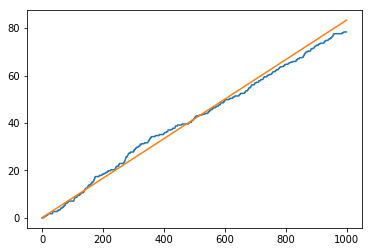

In [4]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)

def beta(valuation):
    #Define your bidding function for n = 2 (1 other bidder) here
    return valuation / 2

simulated = simulate_fpa(2, beta, 'uniform')
expected_profit = [i / 12 for i in range(1, 1001)]

plt.figure()
plt.plot(simulated)
plt.plot(expected_profit)

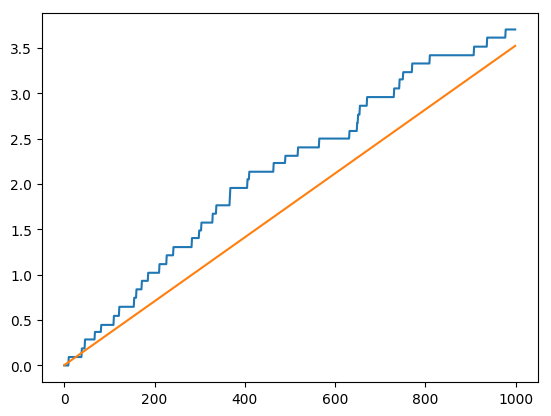

In [28]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)

def beta2(valuation):
    #Define your bidding function for n = 10 (9 other bidders) here
    return 9 * valuation / 10

simulated = simulate_fpa(10, beta2, 'uniform')
expected_profit = [(9 ** 9) / ((10 ** 10) * 11) * i for i in range(1, 1001)]

plt.figure()
plt.plot(simulated)
plt.plot(expected_profit)

In [ ]:
# explanation for difference between graphs

As the number of other bidders increases, the probability of winning decreases. As such, the cumulative expected profit is incremented in distinctly discrete steps for $n = 10$, while for $n = 2$, the cumulative expected profit is much smoother.

### Q1 (b) FPA Exponential
Now assume that everyone (including you) draws their values from the exponential distribution with parameter $\lambda = 2$. **Assuming everyone else is still bidding their valuation**, how good of a bidding function can you empirically create for bidding against 9 other people ($n = 10$), who all bid their valuations? Note that it is not necessary to find a closed-form solution. Just play around with different bidding functions and try to find the best one you can! Additionally, feel free to reuse code from previous parts.

In order to receive the full score, we are expecting the total profit for 1000 trials with 9 other people and the exponential distribution with $\lambda = 2$ to be above 25.

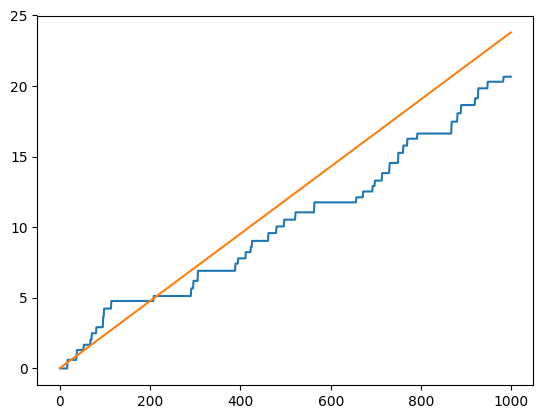

In [241]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line

def beta3(your_valuation): 
    #Define your bidding function for n = 10 (9 other bidders) here
    #everyone draws from the exponential distribution with lambda = 2
    return your_valuation * .7

simulated = simulate_fpa(10, beta3, 'exponential')

plt.figure()
plt.plot(simulated)
plt.plot([i * .023794 for i in range(1, 1001)])

# Q2) Second Price Auction (SPA)
In this auction, each buyer again makes one secret bid. The bidder with the highest bid wins, but they only pay the second highest value. Google uses a modified version of this auction in practice (see<a> https://support.google.com/adsense/answer/160525?hl=en</a>).

Here is an example of a second price ad auction. Only one person gets to show the ad:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$3</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$3.

Operating under the same assumptions as in the first price option case, we assume all buyers draw their values uniformly at random from the $(0,1)$ interval. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$. In fact this is the optimal bidding function in the second price auction.**

Modify your simulator to work for the second-price auction case, or feel free to copy and alter you first price simulator.

## Q2 (a) SPA Profit
Plot your cumulative profit for two buyers as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n$ bidders total ($n-1$ other bidders)? Evaluate the latter for $n = 10$ (9 other bidders).

In [55]:
def simulate_spa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
    """
    # Modify your simulator for SPA here
    profit_timeseries = np.zeros(num_trials)
    current_profit = 0
    
    if distribution == 'uniform':
        dist = lambda: np.random.uniform(size=num_players)
    elif distribution == 'exponential':
        dist = lambda: np.random.exponential(.5, size=num_players)
    else:
        print('invalid distribution:', distribution)
        return
    
    for i in range(num_trials):
        bids = dist()
        valuation = bids[0]
        bids[0] = beta_fn(valuation)
        
        highest = np.argmax(bids)
        remaining = np.delete(bids, highest)
        
        if highest == 0:
            current_profit += valuation - np.max(remaining)
        profit_timeseries[i] = current_profit
        
    return profit_timeseries

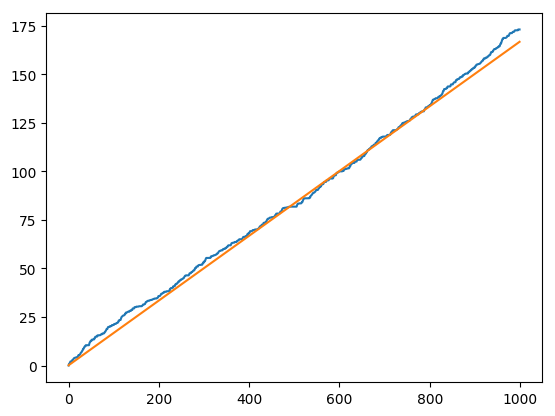

In [103]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)
def beta4(valuation):
    #Define your bidding function for n = 2 (1 other bidder)
    return valuation

simulated = simulate_spa(2, beta4, 'uniform')

plt.figure()
plt.plot(simulated)
plt.plot([i / (2 * 3)  for i in range(1, 1001)])

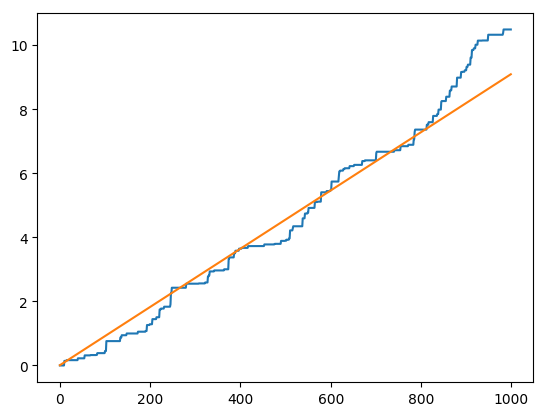

In [68]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)
def beta5(valuation):
    #Define your bidding function for n = 10 (9 other bidders)
    return valuation

simulated = simulate_spa(10, beta5, distribution='uniform')

plt.figure()
plt.plot(simulated)
plt.plot([i / (10 * 11)  for i in range(1, 1001)])

# Q2 (b) Seller Revenue
Now, let's try and see how things look from the other side. Given that all $n$ buyers draw their values uniformly at random from the $(0,1)$ interval, should the seller choose to hold a first price auction, or a second price auction, given that people use optimal bidding functions described above? Show your answer by modifying your simulator for seller revenue (rather than player revenue as we did before) and plotting the revenue from both auctions.

(You can plot $n = 6$ bidders with $100$ trials.)

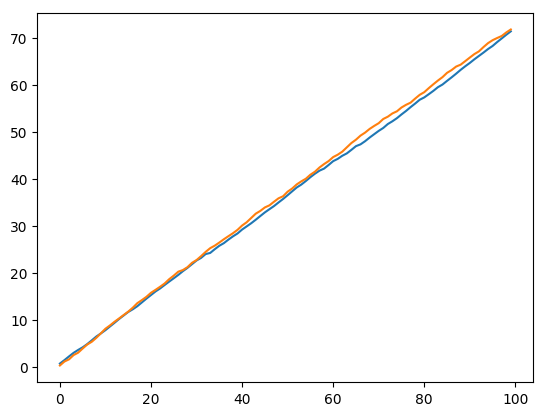

In [109]:
# Modify your simulator for seller revenue
def simulate_seller(num_players, distribution, is_first_price, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    is_first_place (boolean): True for FPA, False for SPA
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from the perspective of a seller
        Entry `i` of this array will contain the total gain of revenue of the
        seller after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
    """
    # Modify your simulator for seller revenue here
    profit_timeseries = np.zeros(num_trials)
    current_profit = 0
    
    if distribution == 'uniform':
        dist = lambda: np.random.uniform(size=num_players)
    elif distribution == 'exponential':
        dist = lambda: np.random.exponential(.5, size=num_players)
    else:
        print('invalid distribution:', distribution)
        return
    
    for i in range(num_trials):
        valuations = dist()
        
        if is_first_price:
            bids = (num_players - 1) * valuations / num_players
        else:
            highest = np.argmax(valuations)
            bids = np.delete(valuations, highest)
    
        current_profit += np.max(bids)
        profit_timeseries[i] = current_profit

    return profit_timeseries
# FPA and SPA revenue plots

fpa_revenue = simulate_seller(6, 'uniform', True, 100)
spa_revenue = simulate_seller(6, 'uniform', False, 100)

plt.figure()
plt.plot(fpa_revenue)
plt.plot(spa_revenue)

In [106]:
# Should the seller choose to hold a FPA or a SPA? Explain.

Both the FPA and SPA result in the same revenue. 

# Q3) First Price Auction with a Reserve

In this scenario, you are again operating as the $\textbf{seller}$. You want to maximize your revenue selling $k$ identical items over $a$ auctions, $a\geq k$, and thus set a reserve price for each auction. This means that unless the maximum bid in a given auction is above the reserve price you set, the transaction is not completed, and no money or goods exchange hands. If the highest bid is above the reserve price, then the transaction occurs as per usual, with the winner paying what he bid in exchange for the item.

Here is an example of a first price auction with a reserve of $4:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.


Whereas, here is an example of that same auction with a reserve of $6:

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Abra</td>
<td>\$5</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Bulbasaur</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charmander</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$0.


Using a similar framework to before, we are now going to try to optimize the reserve to maximize the seller's profit.

### Q3 (a) Varying Reserve
Suppose that you have $1$ iPhone that you can try to sell at $100$ different auctions, with one auction occuring each day, where at each auction $n$ bidders bid independently according to a fixed bidding function and a fixed but unknown distribution. If you can change the reserve for each auction, what should your reserve strategy as the seller be?

Below, please write an explanation of your strategy in markdown (no code needed).

#### Q3 (a) $\mathcal{Y}\text{our beautiful explanation here}$:
Set the reserve to the maximum of bids from the first $\frac{100}{e}$ auctions. Accept the highest bid regardless of reserve on the very last auction.

### Q3 (b) Fixed Reserve
Now suppose that you have $10$ iPhones that you can take to $100$ different auctions, with one first price auction occuring each day, where at each auction $n = 5$ bidders draw their values from the exponential distribution with parameter $2$, with $\beta_j(x_j) = x_j, \forall j$. Empirically try and optimize one fixed reserve value to use over all the auctions to maximize your expected total revenue.

In order to receive the full score, we are expecting the average profit for one round with $10$ iPhones, $100$ auctions and $n = 5$ bidders to be above 20.

In [ ]:
# Your optimized reserve and expected revenue

In [200]:
def simulate_fpa_seller_reserve(reserve, num_players=5, distribution='exponential', num_items=10, num_auctions=100):
    profit = 0
    
    if distribution == "uniform":
        dist = lambda: np.random.uniform(size=num_players)
    elif distribution == "exponential":
        dist = lambda: np.random.exponential(0.5, size=num_players)
    else:
        print("invalid distribution:", distribution)
        return
    
    for i in range(num_auctions):
        if num_items == 0:
            break
            
        valuations = dist()
        
        if np.max(valuations) > reserve and num_items > 0:
            profit += np.max(valuations)
            num_items -= 1
            
    return profit

def test(reserve):
    total = 0
    num_trials = 100
    
    for i in range(num_trials):
        total += simulate_fpa_seller_reserve(reserve)
        
    return total / num_trials

test(1.8)

22.58919863190407

# Competition (Optional)

Now that we've got your attention, we'd like to announce our first lab competition! The top 3 teams (form teams of 3-4 people) will be given extra credit.

The details of the competition are as follows: you are a seller trying to maximize your expected revenue selling $k$ identical items over $a$ different auctions, where $n$ bidders draw their values uniformly at random from the interval $(0,1)$, with $\beta_j(x_j) = x_j, \forall j$. Your job as the seller is to set a single fixed reserve price $r$ to be used over all $a$ auctions, to maximize your revenue. You will submit your solution in a separate python file, _results.py_, which will contain the method `calculateReserve(a, k, n)`, where $a$ = # of auctions, $k$ = # of items, and $n$ = # of bidders. You may include any additional helper functions and standard imports you want. We will allow your algorithm to run for __30 seconds__ for each $(a,k,n)$ input, awarding you $0$ revenue for that input tuple if you run over the time limit. We will be running your code with Python 3, if we are unable to run it, you will not be entered into the competition.

Please include a comment at the top of your _results.py_ file with the names of the members of your team. Only submit this file once per team.

Good Luck!

## References
[1] Sahai, A., Mishra, M., Tandra, R., Woyach, K., 2009. Cognitive radios for spectrum sharing. IEEE Signal
Processing Magazine , 140–146. <br />
[2]  A. Sahai, K. Woyach, K. Harrison, H. Palaiyanur, and R. Tandra, “Towards a “theory of spectrum zoning”,” Allerton, Oct. 2009. <br />
[3] Nozick, Robert. Anarchy, State, and Utopia. New York: Basic, 1974. Print. <br />
[4] Rawls, J. A. (1971) A Theory of Justice. Cambridge, MA: Harvard University Press. <br />


## Definitions
For this model to work, we should start with a list of assumptions:
<ul>
<li> Infinite wealth: Each buyer can afford to pay their valuation of the item;</li>
<li> Anonymity: The only thing that matters is the buyer's bid, not the identity of the buyer (more formally, if buyer $i$ offers $x_i$ and wins against buyer $j$ who offers $x_j$, then buyer $j$ would win if she would offer $x_i + \epsilon$);</li>
<li> Privacy: Buyer $i$ only knows the value $x_i$ and does not know any bids or valuations $\beta_j \text{ or } x_j \ \forall j\neq i$;</li>
<li> All auctions are sealed-bid auctions: Every buyer submits the bid simultaneously.</li>
</ul>
[Back to Assumptions](#Assumptions)